# The Sparks Foundation #GRIPJUNE21

## Computer Vision & Internet of Things

### Task 4 : Detection of face mask

### By - DIPAN MANDAL

### About the project :-
- This Project is done with the help of Tenserflow, Keras, Numpy and OpenCV on Python. This project uses a pre-trained deep learning model to detect face masks. The face detection is done with the concept of "**Cascade Classifier**" method proposed by Paul Viola and Michael Jones in their paper, "**Rapid Object Detection using a Boosted Cascade of Simple Features**" in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.


In [1]:
# Importing the depencies.

import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

**- Loading the face mask detecting model created in the program "Training_prog", then creating a cascade classifier object named "face_detect".**

In [2]:
model =  keras.models.load_model('mask_detector2.model')

# Creating a Cascade Classifier object for Face Detection
face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

**- Taking webcam feed and deploying the face mask detection model along with cascade classifier method.**


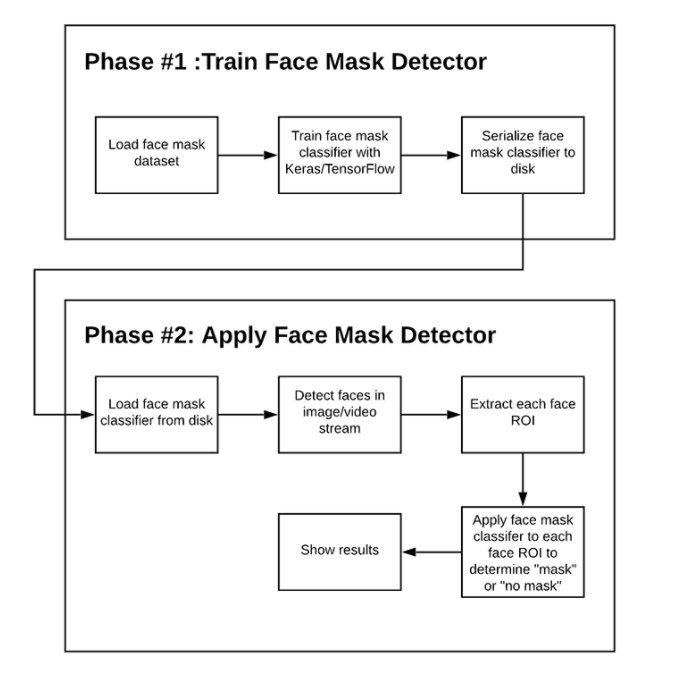

In [4]:
video = cv2.VideoCapture(0)  # 0 - From Webcam

while True:
    check, frame = video.read()
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face = face_detect.detectMultiScale(gray, 1.3, 5)
    
    for x, y, w, h in face:
        face_img = gray[y:y+w, x:x+w]
        resized = cv2.resize(face_img,(100, 100))
        normalized = resized/255.0
        reshaped = np.reshape(normalized,(1, 100, 100, 1))
        result = model.predict(reshaped)
        #print(result)
        label = np.argmax(result, axis = 1)[0]
        
        cv2.rectangle(frame, (x,y), (x+w,y+h), color_dict[label], 2)
        cv2.rectangle(frame, (x,y-40), (x+w,y), color_dict[label], -1)

        if result[0][label] > 0.8:
            cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
        else:
            cv2.putText(frame, "Uncertain", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)
            
    cv2.imshow('Webcam Feed',frame)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
video.release()

## This concludes the topic, Face Mask Detection.